### Section: Case study: Auto image classification

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 25.93 MiB/s, done.
Resolving deltas: 100% (10/10), done.


#### Loading the relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

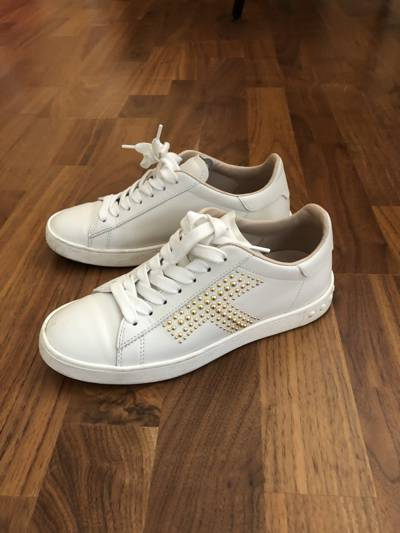

In [3]:
from tensorflow.keras.preprocessing.image import load_img
path = 'clothing-dataset-small/train/shoes'
img = 'd09be031-92c0-4b14-bb7d-6d4926d3f6e2.jpg'
full_path = path + '/' + img
load_img(full_path)

In [ ]:
sample_img = load_img(full_path)
np.array(sample_img).shape

(533, 400, 3)

In [ ]:
train_dir = "clothing-dataset-small/train"
val_dir = "clothing-dataset-small/validation"

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
img_dim = 128
train_ds_gen = image_dataset_from_directory(
                  train_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42
)

Found 3068 files belonging to 10 classes.


In [ ]:
val_ds_gen = image_dataset_from_directory(
                  val_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42
)

Found 341 files belonging to 10 classes.


In [ ]:
class_names = train_ds_gen.class_names
print(class_names)

['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']


### Section: Traditional Convolutional Neural Networks

In [ ]:
num_classes = len(class_names)

10

In [ ]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model_conv = Sequential()
model_conv.add(Rescaling(1./255, input_shape=(img_dim, img_dim, 3)))

model_conv.add(Conv2D(16, 3, padding='same', activation='relu'))
model_conv.add(MaxPooling2D())
model_conv.add(Conv2D(32, 3, padding='same', activation='relu'))
model_conv.add(MaxPooling2D())
model_conv.add(Conv2D(64, 3, padding='same', activation='relu'))
model_conv.add(MaxPooling2D())

model_conv.add(Flatten())
model_conv.add(Dense(64, activation='relu'))
model_conv.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
epochs=10
history = model_conv.fit(train_ds_gen,
                         validation_data=val_ds_gen,
                         epochs=epochs)

Epoch 1/10
96/96 [==============================] - 24s 107ms/step - loss: 1.7776 - accuracy: 0.4120 - val_loss: 1.5495 - val_accuracy: 0.4780
Epoch 2/10
96/96 [==============================] - 6s 56ms/step - loss: 1.2069 - accuracy: 0.6173 - val_loss: 1.2203 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 4s 41ms/step - loss: 0.8630 - accuracy: 0.7164 - val_loss: 1.1888 - val_accuracy: 0.6100
Epoch 4/10
96/96 [==============================] - 5s 53ms/step - loss: 0.6336 - accuracy: 0.7849 - val_loss: 0.9995 - val_accuracy: 0.6833
Epoch 5/10
96/96 [==============================] - 9s 90ms/step - loss: 0.4299 - accuracy: 0.8572 - val_loss: 1.0592 - val_accuracy: 0.6833
Epoch 6/10
96/96 [==============================] - 5s 49ms/step - loss: 0.2725 - accuracy: 0.9169 - val_loss: 1.2463 - val_accuracy: 0.6979
Epoch 7/10
96/96 [==============================] - 7s 68ms/step - loss: 0.1929 - accuracy: 0.9407 - val_loss: 1.4975 - val_accuracy: 0.6540
Epoch 8/10


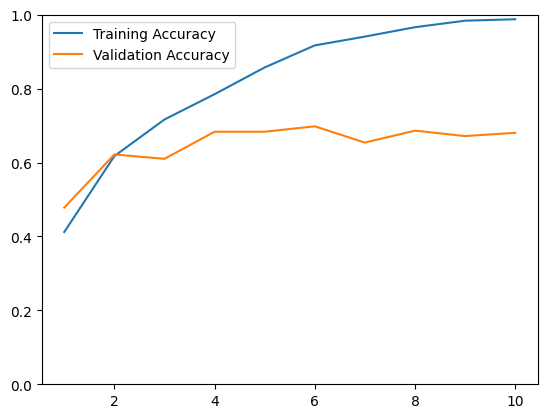

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
x = np.arange(1, epochs+1)
plt.plot(x, train_acc, label="Training Accuracy")
plt.plot(x, val_acc, label="Validation Accuracy")
plt.ylim(0,1); plt.legend()
plt.show()

In [ ]:
def plot_perf(hist, epochs):
  train_acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  x = np.arange(1, epochs+1)
  plt.plot(x, train_acc, label="Training Accuracy")
  plt.plot(x, val_acc, label="Validation Accuracy")
  plt.ylim(0,1); plt.legend()
  plt.show()

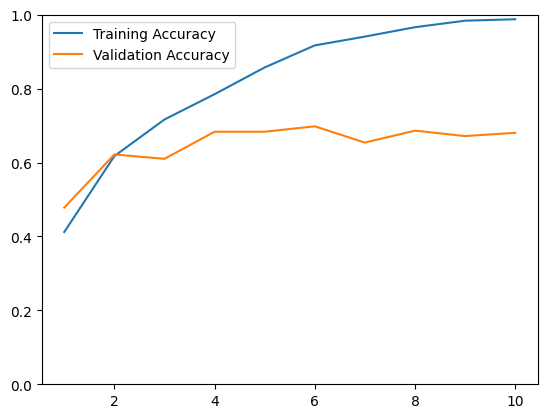

In [ ]:
plot_perf(history, 10)

### Exercise 9.1: Convolution model with dropout

In [ ]:
from keras.layers import Dropout, SpatialDropout2D

In [ ]:
model_dropout = Sequential()
model_dropout.add(Rescaling(1./255, input_shape=(img_dim, img_dim, 3)))
model_dropout.add(Conv2D(16, 3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D())
model_dropout.add(SpatialDropout2D(0.5))

model_dropout.add(Conv2D(32, 3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D())
model_dropout.add(SpatialDropout2D(0.5))
model_dropout.add(Conv2D(64, 3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D())

model_dropout.add(Flatten())
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 16)       0         
 ropout2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)      

In [ ]:
epochs=10
history = model_dropout.fit(
  train_ds_gen,
  validation_data=val_ds_gen,
  epochs=epochs
)

Epoch 1/10
96/96 [==============================] - 8s 46ms/step - loss: 2.1562 - accuracy: 0.2627 - val_loss: 2.1814 - val_accuracy: 0.3050
Epoch 2/10
96/96 [==============================] - 4s 43ms/step - loss: 1.9280 - accuracy: 0.3664 - val_loss: 1.7825 - val_accuracy: 0.4252
Epoch 3/10
96/96 [==============================] - 6s 58ms/step - loss: 1.6505 - accuracy: 0.4593 - val_loss: 1.5417 - val_accuracy: 0.5337
Epoch 4/10
96/96 [==============================] - 5s 46ms/step - loss: 1.4646 - accuracy: 0.5196 - val_loss: 1.4511 - val_accuracy: 0.5367
Epoch 5/10
96/96 [==============================] - 5s 54ms/step - loss: 1.3427 - accuracy: 0.5623 - val_loss: 1.3698 - val_accuracy: 0.5836
Epoch 6/10
96/96 [==============================] - 5s 46ms/step - loss: 1.2325 - accuracy: 0.5857 - val_loss: 1.3270 - val_accuracy: 0.5865
Epoch 7/10
96/96 [==============================] - 5s 46ms/step - loss: 1.1416 - accuracy: 0.6294 - val_loss: 1.2760 - val_accuracy: 0.6129
Epoch 8/10
96

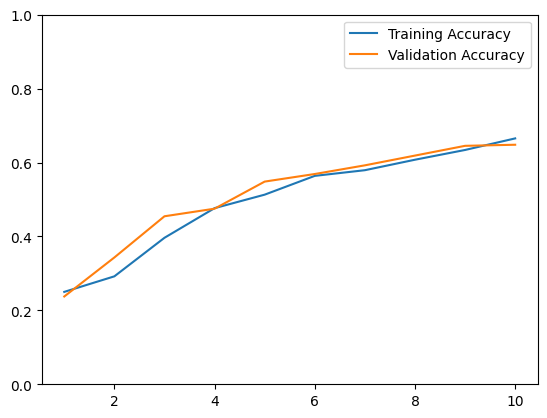

In [ ]:
plot_perf(history, epochs)

### Section: Batch normalization

In [ ]:
from keras.layers import BatchNormalization, ReLU

In [ ]:
model_norm = Sequential()
model_norm.add(Rescaling(1./255, input_shape=(img_dim, img_dim, 3)))
model_norm.add(Conv2D(16, 3, padding='same'))
model_norm.add(BatchNormalization())
model_norm.add(ReLU())
model_norm.add(MaxPooling2D())

model_norm.add(Conv2D(32, 3, padding='same'))
model_norm.add(BatchNormalization())
model_norm.add(ReLU())
model_norm.add(MaxPooling2D())
model_norm.add(Conv2D(64, 3, padding='same'))
model_norm.add(BatchNormalization())
model_norm.add(ReLU())
model_norm.add(MaxPooling2D())

model_norm.add(Flatten())
model_norm.add(Dense(64, activation='relu'))
model_norm.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_norm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_21 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 re_lu_21 (ReLU)             (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 32)      

In [ ]:
epochs=10
history = model_norm.fit(
  train_ds_gen,
  validation_data=val_ds_gen,
  epochs=epochs
)

Epoch 1/10
96/96 [==============================] - 14s 99ms/step - loss: 2.6834 - accuracy: 0.3198 - val_loss: 2.1659 - val_accuracy: 0.2493
Epoch 2/10
96/96 [==============================] - 5s 46ms/step - loss: 1.7122 - accuracy: 0.4228 - val_loss: 2.0062 - val_accuracy: 0.3226
Epoch 3/10
96/96 [==============================] - 5s 51ms/step - loss: 1.5356 - accuracy: 0.4677 - val_loss: 2.0103 - val_accuracy: 0.2727
Epoch 4/10
96/96 [==============================] - 7s 64ms/step - loss: 1.4115 - accuracy: 0.5036 - val_loss: 1.6874 - val_accuracy: 0.4076
Epoch 5/10
96/96 [==============================] - 6s 58ms/step - loss: 1.2915 - accuracy: 0.5342 - val_loss: 1.5547 - val_accuracy: 0.4633
Epoch 6/10
96/96 [==============================] - 4s 43ms/step - loss: 1.1965 - accuracy: 0.5603 - val_loss: 1.4305 - val_accuracy: 0.5103
Epoch 7/10
96/96 [==============================] - 5s 45ms/step - loss: 1.1033 - accuracy: 0.5958 - val_loss: 1.4262 - val_accuracy: 0.5044
Epoch 8/10
9

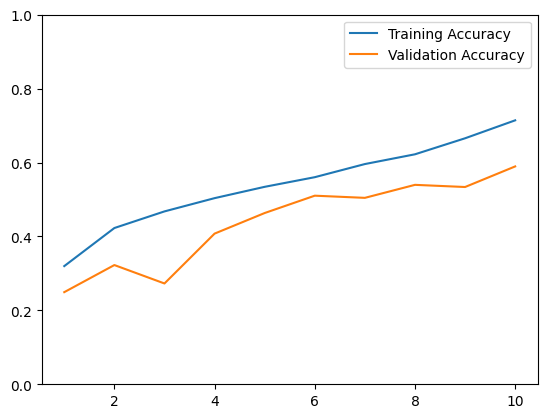

In [ ]:
plot_perf(history, epochs)

### Section: Data Augmentation


In [ ]:
from keras import layers

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_dim, img_dim, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3),
    layers.GaussianNoise(0.2)
  ]
)

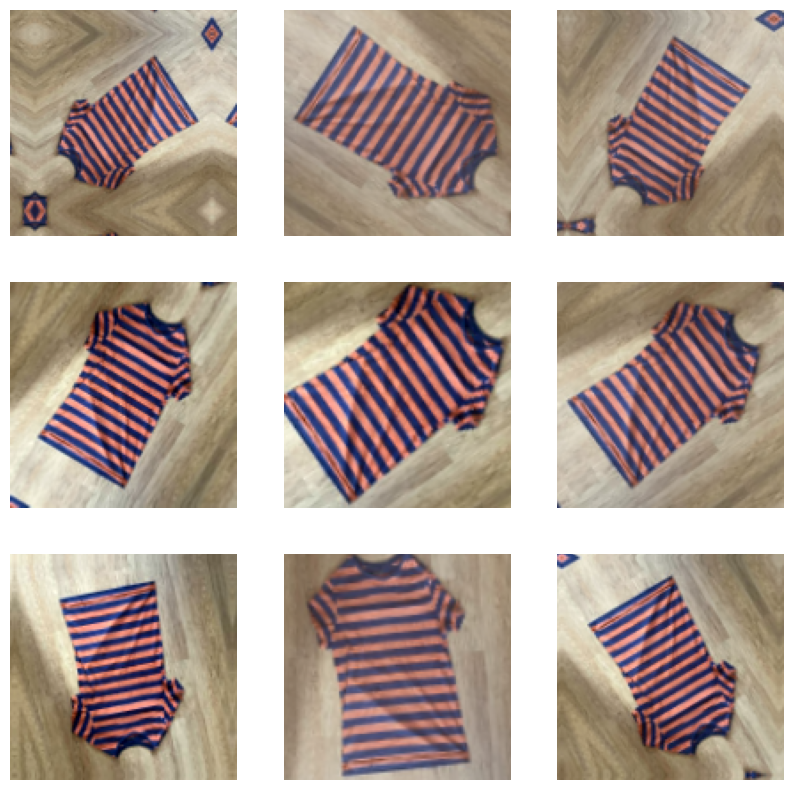

In [ ]:
for images, _ in train_ds_gen.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Exercise 9.2: Conv model with data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_dim, img_dim, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
  ]
)

In [ ]:
model_aug = Sequential()
model_aug.add(Rescaling(1./255, input_shape=(img_dim, img_dim, 3)))
model_aug.add(data_augmentation)
model_aug.add(Conv2D(16, 3, padding='same', activation='relu'))

model_aug.add(MaxPooling2D())
model_aug.add(Conv2D(32, 3, padding='same', activation='relu'))
model_aug.add(MaxPooling2D())
model_aug.add(Conv2D(64, 3, padding='same', activation='relu'))
model_aug.add(MaxPooling2D())
model_aug.add(Flatten())
model_aug.add(Dense(64, activation='relu'))
model_aug.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_aug.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 sequential_22 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                

In [ ]:
epochs=20
history = model_aug.fit(
  train_ds_gen,
  validation_data=val_ds_gen,
  epochs=epochs
)

Epoch 1/20
96/96 [==============================] - 10s 67ms/step - loss: 2.0968 - accuracy: 0.2539 - val_loss: 2.0547 - val_accuracy: 0.2874
Epoch 2/20
96/96 [==============================] - 7s 75ms/step - loss: 1.9681 - accuracy: 0.3188 - val_loss: 1.9159 - val_accuracy: 0.3490
Epoch 3/20
96/96 [==============================] - 6s 59ms/step - loss: 1.8314 - accuracy: 0.3787 - val_loss: 1.8427 - val_accuracy: 0.3578
Epoch 4/20
96/96 [==============================] - 6s 61ms/step - loss: 1.7225 - accuracy: 0.4123 - val_loss: 1.7147 - val_accuracy: 0.4223
Epoch 5/20
96/96 [==============================] - 4s 43ms/step - loss: 1.6216 - accuracy: 0.4537 - val_loss: 1.6987 - val_accuracy: 0.4164
Epoch 6/20
96/96 [==============================] - 6s 59ms/step - loss: 1.5741 - accuracy: 0.4654 - val_loss: 1.6574 - val_accuracy: 0.4194
Epoch 7/20
96/96 [==============================] - 5s 46ms/step - loss: 1.5124 - accuracy: 0.4922 - val_loss: 1.5155 - val_accuracy: 0.4692
Epoch 8/20
9

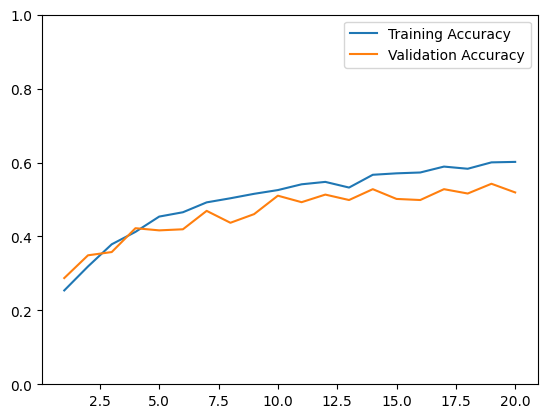

In [ ]:
plot_perf(history, epochs)

### Section: VGG design approach

In [ ]:
def conv_block(num_layers, num_filters):
  for n in range(num_layers):
    model_vgg.add(Conv2D(num_filters, (3,3),\
                     strides=(1,1), padding='same',
                     activation='relu'))
  model_vgg.add(MaxPooling2D((2,2), strides=(2,2)))

### Exercise 9.3: Creating VGG16 from scratch

In [ ]:
!pip install visualkeras
import visualkeras

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model_vgg = Sequential()
model_vgg.add(Conv2D(64, (3,3), strides=(1,1), \
                      padding='same', activation='relu',
                      input_shape=(img_dim, img_dim, 3)))

In [ ]:
conv_block(1, 64)
conv_block(2, 128)
conv_block(3, 256)
conv_block(3, 512)
conv_block(3, 512)

In [ ]:
model_vgg.add(Flatten())
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_vgg.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                 

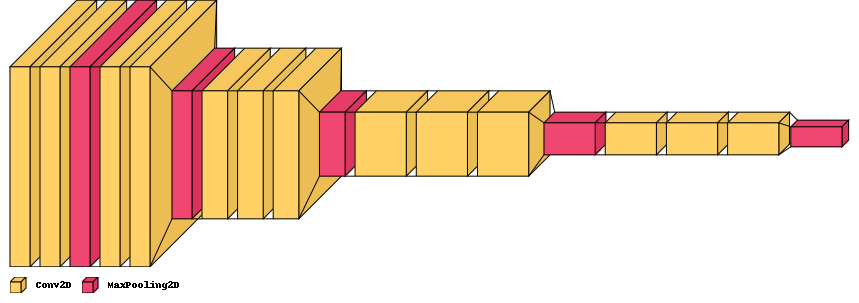

In [ ]:
visualkeras.layered_view(model_vgg, legend=True, type_ignore=[Flatten, Dense], max_xy=300)

In [ ]:
epochs=20
history = model_vgg.fit(
  train_ds_gen,
  validation_data=val_ds_gen,
  epochs=epochs
)
plot_perf(history, epochs)

Epoch 1/20
96/96 [==============================] - 20s 158ms/step - loss: 17.6281 - accuracy: 0.2425 - val_loss: 2.1618 - val_accuracy: 0.2375
Epoch 2/20
96/96 [==============================] - 15s 154ms/step - loss: 1.8776 - accuracy: 0.3680 - val_loss: 2.0576 - val_accuracy: 0.2845
Epoch 3/20
96/96 [==============================] - 15s 152ms/step - loss: 1.6256 - accuracy: 0.4426 - val_loss: 1.5211 - val_accuracy: 0.4927
Epoch 4/20
96/96 [==============================] - 15s 153ms/step - loss: 1.3531 - accuracy: 0.5368 - val_loss: 1.3380 - val_accuracy: 0.5484
Epoch 5/20
96/96 [==============================] - 15s 154ms/step - loss: 1.1733 - accuracy: 0.5952 - val_loss: 1.3593 - val_accuracy: 0.5484
Epoch 6/20
96/96 [==============================] - 15s 157ms/step - loss: 1.0131 - accuracy: 0.6522 - val_loss: 1.1232 - val_accuracy: 0.6012
Epoch 7/20
96/96 [==============================] - 16s 158ms/step - loss: 0.8496 - accuracy: 0.7047 - val_loss: 1.1673 - val_accuracy: 0.604

### Section: ResNet design approach

In [ ]:
Creating an identity link
x_shortcut = x
x = Conv2D(64, (3,3), strides=(1,1), padding='same')(x)
x = ReLu()(x)
x = Conv2D(64, (3,3), strides=(1,1), padding='same')(x)
x = ReLu()(x)
x = layers.add([x_shortcut, x])

In [ ]:
def block_residual(num_filters, x):
  x_shortcut = x
  x = Conv2D(num_filters, (3,3), strides=(1,1), \
             padding='same', activation = 'relu')(x)
  x = Conv2D(num_filters, (3,3), strides=(1,1), \
             padding='same', activation = 'relu')(x)
  x = add([x_shortcut, x])

  return x

In [ ]:
def block_conv(num_filters, x):
  x = Conv2D(num_filters, (3,3), strides=(1,1), \
             padding='same', activation = 'relu')(x)
  x = Conv2D(num_filters, (3,3), strides=(1,1), \
             padding='same', activation = 'relu')(x)

  return x

#Notice the absence of pooling in the block, unlike in the VGG16

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dense, GlobalAveragePooling2D
from keras.layers import add, Input
from keras import Model

In [ ]:
inputs = Input(shape=(img_dim, img_dim, 3))

In [ ]:
x = Conv2D(64, (7, 7), strides=(2, 2), \
           padding='same', activation='relu')(inputs)
x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

In [ ]:
x = block_residual(64, x)
x = block_residual(64, x)
x = block_residual(64, x)

In [ ]:
x = block_conv(128, x)

In [ ]:
x = block_residual(128, x)
x = block_residual(128, x)
x = block_residual(128, x)

In [ ]:
x = block_conv(256, x)

In [ ]:
x = block_residual(256, x)
x = block_residual(256, x)
x = block_residual(256, x)
x = block_residual(256, x)
x = block_residual(256, x)

In [ ]:
x = block_conv(512, x)
x = block_residual(512, x)
x = block_residual(512, x)

In [ ]:
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation = 'softmax')(x)
resnet = Model(inputs, outputs)
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_67 (Conv2D)             (None, 64, 64, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_37 (MaxPooling2D  (None, 32, 32, 64)  0           ['conv2d_67[0][0]']              
 )                                                                                                
                                                                                              

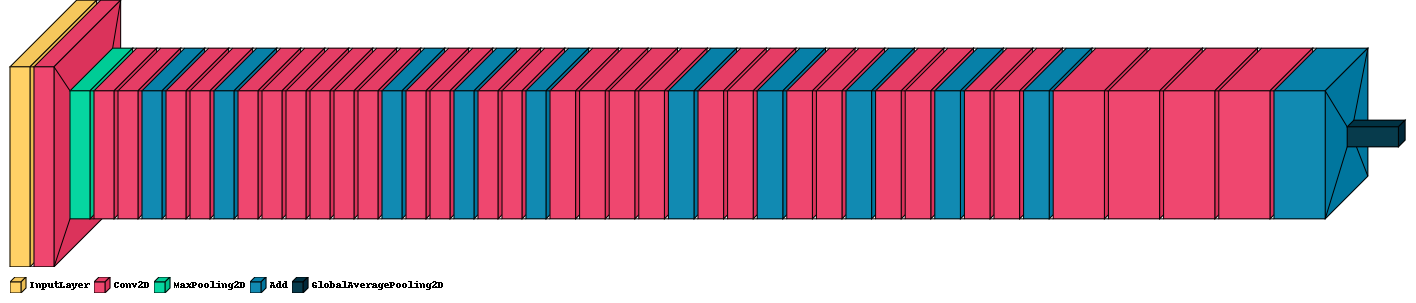

In [ ]:
visualkeras.layered_view(resnet, legend=True, \
                         type_ignore=[Flatten, Dense, Input], \
                         max_xy=200, spacing=4)